In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plts

%matplotlib inline

In [118]:
df10 = pd.read_csv('DATA/clean10.csv', index_col=0)
df20 = pd.read_csv('DATA/clean20.csv', index_col=0)

nos limitamos a Ensenada

In [119]:
ens20 = df20[df20['NOM_LOC']=='Ensenada']
ens10 = df10[df10['NOM_LOC']=='Ensenada']

In [120]:
len(ens20['AGEB'].unique())

220

LIMPIEZA

In [121]:
#delete columns NOM_MUN	LOC	NOM_LOC
ens20 = ens20.drop(['NOM_MUN', 'LOC', 'NOM_LOC'], axis=1)
ens10 = ens10.drop(['NOM_MUN', 'LOC', 'NOM_LOC'], axis=1)	

In [122]:
#rename column PNACOE for OTRAENT
ens10.rename(columns={'PNACOE':'OTRAENT'}, inplace=True)

ens20.rename(columns={'PNACOE':'OTRAENT'}, inplace=True)

In [123]:
limpiar = ['P_TOTAL', 'P_0A2', 'P_3A5', 'POB65_MAS', 'GRAPROES', 'PROM_HNV', 'VIVTOT', 'PRO_OCUP_C', 'PROM_OCUP', 'VPH_PC', 'OTRAENT']

In [124]:
#replace * with the last value for 10
for col in limpiar:
    ens10[col] = ens10[col].replace('*', np.nan)
    ens10[col] = ens10[col].fillna(method='ffill')
    ens10[col] = ens10[col].fillna(method='bfill')

#replace * with the last value for 20
for col in limpiar:
    ens20[col] = ens20[col].replace('*', np.nan)
    ens20[col] = ens20[col].fillna(method='ffill')
    ens20[col] = ens20[col].fillna(method='bfill')

In [125]:
#convert to float the columns in limpiar
for col in limpiar:
    ens10[col] = ens10[col].astype(float)

#convert to float the columns in limpiar
for col in limpiar:
    ens20[col] = ens20[col].astype(float)

In [126]:
ens20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6007 entries, 4 to 6229
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGEB        6007 non-null   object 
 1   MZA         6007 non-null   int64  
 2   P_TOTAL     6007 non-null   float64
 3   P_0A2       6007 non-null   float64
 4   P_3A5       6007 non-null   float64
 5   POB65_MAS   6007 non-null   float64
 6   GRAPROES    6007 non-null   float64
 7   PROM_HNV    6007 non-null   float64
 8   VIVTOT      6007 non-null   float64
 9   PRO_OCUP_C  6007 non-null   float64
 10  PROM_OCUP   6007 non-null   float64
 11  VPH_PC      6007 non-null   float64
 12  OTRAENT     6007 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 657.0+ KB


necesitamos edad de 0 a 5, entonces sumamos 0 a 2 y 3 a 5

In [127]:
#10: sumamos los valores de los campos de edad
ens10['P_0A5'] = ens10['P_0A2'] + ens10['P_3A5']
#borramos los sumados
ens10 = ens10.drop(['P_0A2', 'P_3A5'], axis=1)

#20: sumamos los valores de los campos de edad
ens20['P_0A5'] = ens20['P_0A2'] + ens20['P_3A5']
#borramos los sumados
ens20 = ens20.drop(['P_0A2', 'P_3A5'], axis=1)

cuales agebs queremos?

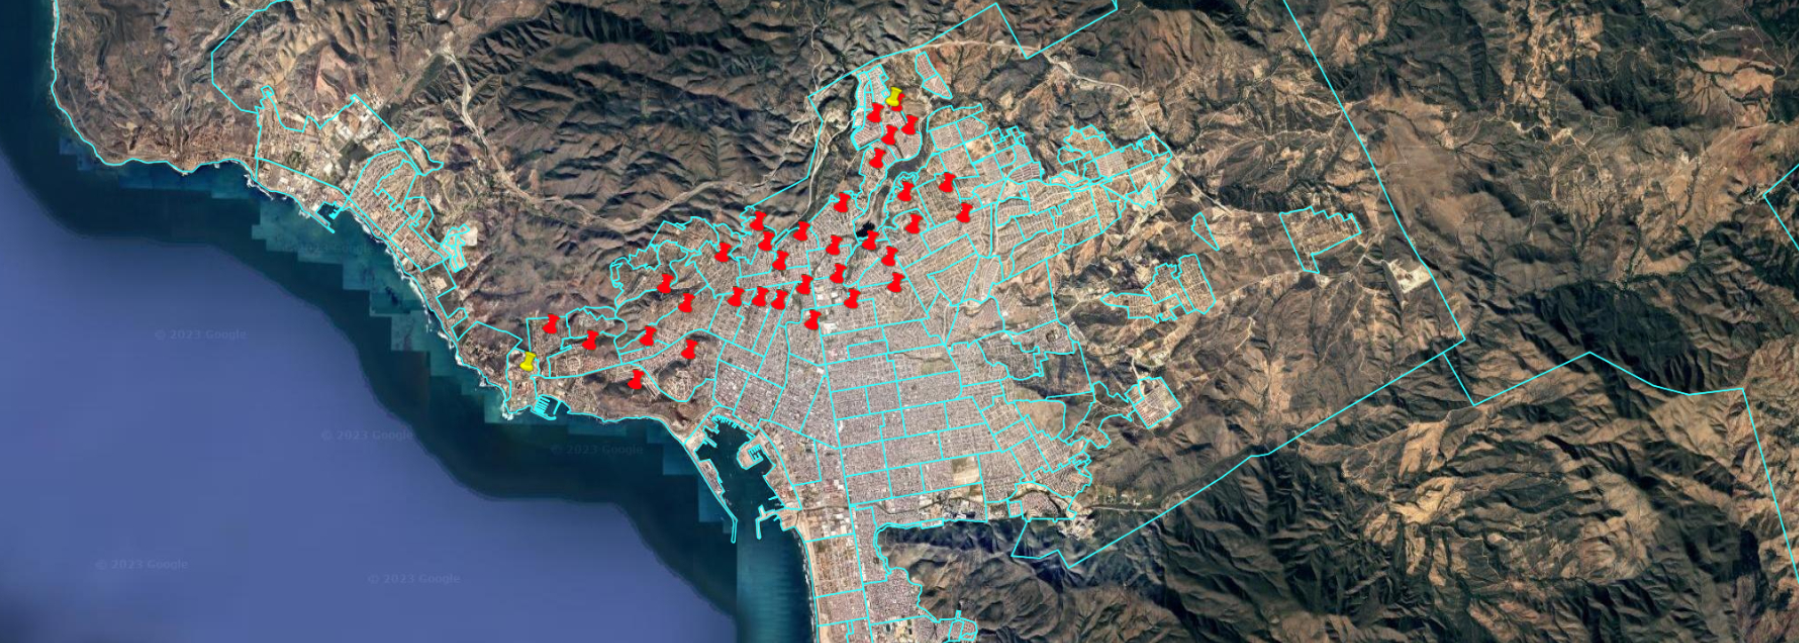

In [128]:
nor_agebs = [
    #~cons
    '8089', 
    '0435',
    '7678', 
    '7663', 
    '7714', 
    '6006', 
    #~valle verde
    '770A', 
    '7729', 
    '7752', 
    '7786', 
    '7748', 
    '7733', 
    #~encinos
    '101A', 
    '1024', 
    '1255', 
    '1005', 
    #~enmedio
    '0454', 
    '0558', 
    '044A', 
    '7451', 
    '0543', 
    '0524', 
    '0562', 
    '0577', 
    '0581', 
    #~moderna
    '7767', 
    '7771', 
    '0647', 
    '0505', 
    '7697', 
    #~uabc
    '0492', 
    '6025', 
    '0628'
]

solo nos quedamos con los agebs que nos interesan

In [129]:
#only keep agebs in nor_agebs
norens20 = ens20[ens20['AGEB'].isin(nor_agebs)]
norens10 = ens10[ens10['AGEB'].isin(nor_agebs)]

AGRUPAMOS POR AGEB

In [130]:
#definimos un diccionario para el groupby
agg_dict = {}

#le ponemos suma a todos los que no sean object
for col in norens20.columns.tolist():
    if norens20[col].dtype == np.dtype('float64'):
        agg_dict[col] = 'sum'
    else:
        agg_dict[col] = 'first'

#les ponemos media a los que correspondan
media = ['GRAPROES', 'PROM_HNV', 'PRO_OCUP_C', 'PROM_OCUP']

for col in media:
    agg_dict[col] = 'mean'

agg_dict

{'AGEB': 'first',
 'MZA': 'first',
 'P_TOTAL': 'sum',
 'POB65_MAS': 'sum',
 'GRAPROES': 'mean',
 'PROM_HNV': 'mean',
 'VIVTOT': 'sum',
 'PRO_OCUP_C': 'mean',
 'PROM_OCUP': 'mean',
 'VPH_PC': 'sum',
 'OTRAENT': 'sum',
 'P_0A5': 'sum'}

In [131]:
#aplicamos las funciones de arriba
norens10_agebs = norens10.groupby('AGEB', as_index=False).agg(agg_dict)
norens20_agebs = norens20.groupby('AGEB', as_index=False).agg(agg_dict)

In [132]:
#delete column MZA
norens10_agebs = norens10_agebs.drop(['MZA'], axis=1)
norens20_agebs = norens20_agebs.drop(['MZA'], axis=1)

In [133]:
#delete agebs that are in sv20 but not in sv10
norens20_agebs = norens20_agebs[norens20_agebs['AGEB'].isin(norens10_agebs['AGEB'])]

In [134]:
print (norens20_agebs['AGEB'].count() == norens10_agebs['AGEB'].count())

True


QUE TENEMOS?

In [135]:
norens10_agebs

,AGEB,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
0,0435,3632.0,325.0,9.617302,2.193333,1321.0,0.853016,3.352540,584.0,1241.0,419.0
1,044A,1539.0,224.0,9.569643,2.264286,549.0,0.750714,3.152143,254.0,478.0,135.0
2,0454,2211.0,188.0,10.994717,1.929057,742.0,0.661887,3.145849,438.0,760.0,118.0
3,0492,557.0,15.0,7.670000,0.912826,281.0,0.372609,1.648261,189.0,271.0,39.0
4,0505,730.0,135.0,14.026154,1.999231,300.0,0.506154,2.862308,199.0,282.0,20.0
5,0524,3040.0,276.0,9.127049,2.500164,1083.0,0.816885,3.296066,497.0,1074.0,364.0
6,0543,1871.0,223.0,8.496364,2.461455,679.0,0.914182,3.327455,232.0,669.0,174.0
7,0558,2426.0,194.0,12.341053,1.795789,903.0,0.635789,3.039474,612.0,873.0,196.0
8,0562,1575.0,272.0,11.725385,1.908077,630.0,0.618846,2.908077,317.0,469.0,146.0
9,0577,1199.0,209.0,12.899714,1.506286,604.0,0.511143,2.523429,335.0,512.0,62.0


LIMPIAR PARA WEKA

In [136]:
import unidecode # for removing accents from column names

#remove accents from column names
norens10_agebs.columns = [unidecode.unidecode(c) for c in norens10_agebs.columns]
norens20_agebs.columns = [unidecode.unidecode(c) for c in norens20_agebs.columns]

EXPORTAR

In [137]:
# save the cleaned data as a CSV file
norens10_agebs.to_csv('DATA/NORENS_AGEBS_10.csv', index=False)
norens20_agebs.to_csv('DATA/NORENS_AGEBS_20.csv', index=False)